In [11]:
# For team information
from nba_api.stats.static import teams

# For player information
from nba_api.stats.static import players

from sklearn.preprocessing import StandardScaler

from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguedashteamstats, leaguegamefinder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Get all teams
all_teams = teams.get_teams()

# Define the seasons from "2000-01" to "2004-05"
seasons = ['2000-01', '2001-02', '2002-03', '2003-04', '2004-05']

# Data structures to hold data for each season
all_team_stats = {}
games_2000_05data = {}

scaler = StandardScaler()

for season in seasons:
    # Collect team stats for the season
    team_stats = leaguedashteamstats.LeagueDashTeamStats(season=season).get_data_frames()[0]
    
    # Data Cleaning and Preprocessing for team_stats
    # Handling missing values
    for column in team_stats.columns:
        if team_stats[column].isnull().any():
            team_stats[column].fillna(team_stats[column].mean(), inplace=True)
       
    
    # Standardize columns 'PTS', 'AST', and 'REB'
    team_stats[['PTS', 'AST', 'REB']] = scaler.fit_transform(team_stats[['PTS', 'AST', 'REB']])
    
    # Store the cleaned and preprocessed team stats
    all_team_stats[season] = team_stats
    
    # Collect game results for the season
    season_games = []
    for team in all_teams:
        team_id = team['id']
        games = leaguegamefinder.LeagueGameFinder(team_id_nullable=team_id, season_nullable=season).get_data_frames()[0]
        
        # Data Cleaning and Preprocessing for games data
        # Handling missing values
        for column in games.columns:
            if games[column].isnull().any():
                games[column].fillna(games[column].mean(), inplace=True)
                
    
        season_games.append(games)
            
    # Concatenate all games for the season into a single DataFrame
    games_2000_05data[season] = pd.concat(season_games)


In [8]:
games_2000_05data

{'2000-01':    SEASON_ID     TEAM_ID TEAM_ABBREVIATION          TEAM_NAME     GAME_ID  \
 0      22000  1610612737               ATL      Atlanta Hawks  0020001172   
 1      22000  1610612737               ATL      Atlanta Hawks  0020001165   
 2      22000  1610612737               ATL      Atlanta Hawks  0020001149   
 3      22000  1610612737               ATL      Atlanta Hawks  0020001138   
 4      22000  1610612737               ATL      Atlanta Hawks  0020001127   
 ..       ...         ...               ...                ...         ...   
 87     22000  1610612766               CHH  Charlotte Hornets  0020000064   
 88     22000  1610612766               CHH  Charlotte Hornets  0020000034   
 89     22000  1610612766               CHH  Charlotte Hornets  0020000031   
 90     22000  1610612766               CHH  Charlotte Hornets  0020000017   
 91     22000  1610612766               CHH  Charlotte Hornets  0020000004   
 
      GAME_DATE      MATCHUP WL  MIN  PTS  ... FT_P

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Get all teams
all_teams = teams.get_teams()

# Define the seasons from "2005-06" to "2009-10"
seasons = ['2005-06', '2006-07', '2007-08', '2008-09', '2009-10']

# Data structures to hold data for each season
all_team_stats = {}
games_2005_10data = {}

scaler = StandardScaler()

for season in seasons:
    # Collect team stats for the season
    team_stats = leaguedashteamstats.LeagueDashTeamStats(season=season).get_data_frames()[0]
    
    # Data Cleaning and Preprocessing for team_stats
    # Handling missing values
    numeric_cols = team_stats.select_dtypes(include=[np.number]).columns
    for column in numeric_cols:
        if team_stats[column].isnull().any():
            team_stats[column].fillna(team_stats[column].mean(), inplace=True)
    
        
    # Standardize columns 'PTS', 'AST', and 'REB'
    team_stats[['PTS', 'AST', 'REB']] = scaler.fit_transform(team_stats[['PTS', 'AST', 'REB']])
    
    # Store the cleaned and preprocessed team stats
    all_team_stats[season] = team_stats
    
    # Collect game results for the season
    season_games = []
    for team in all_teams:
        team_id = team['id']
        games = leaguegamefinder.LeagueGameFinder(team_id_nullable=team_id, season_nullable=season).get_data_frames()[0]
        
        # Data Cleaning and Preprocessing for games data
        # Handling missing values
        numeric_cols_games = games.select_dtypes(include=[np.number]).columns
        for column in numeric_cols_games:
            if games[column].isnull().any():
                games[column].fillna(games[column].mean(), inplace=True)
                
        season_games.append(games)
            
    # Concatenate all games for the season into a single DataFrame
    games_2005_10data[season] = pd.concat(season_games)


In [13]:
games_2005_10data

{'2005-06':    SEASON_ID     TEAM_ID TEAM_ABBREVIATION          TEAM_NAME     GAME_ID  \
 0      22005  1610612737               ATL      Atlanta Hawks  0020501217   
 1      22005  1610612737               ATL      Atlanta Hawks  0020501214   
 2      22005  1610612737               ATL      Atlanta Hawks  0020501190   
 3      22005  1610612737               ATL      Atlanta Hawks  0020501178   
 4      22005  1610612737               ATL      Atlanta Hawks  0020501162   
 ..       ...         ...               ...                ...         ...   
 85     12005  1610612766               CHA  Charlotte Bobcats  0010500061   
 86     12005  1610612766               CHA  Charlotte Bobcats  0010500042   
 87     12005  1610612766               CHA  Charlotte Bobcats  0010500034   
 88     12005  1610612766               CHA  Charlotte Bobcats  0010500020   
 89     12005  1610612766               CHA  Charlotte Bobcats  0010500015   
 
      GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Get all teams
all_teams = teams.get_teams()

# Define the seasons from "2010-11" to "2014-15"
seasons = ['2010-11', '2011-12', '2012-13', '2013-14', '2014-15']

# Data structures to hold data for each season
all_team_stats = {}
games_2010_15data = {}

scaler = StandardScaler()

for season in seasons:
    # Collect team stats for the season
    team_stats = leaguedashteamstats.LeagueDashTeamStats(season=season).get_data_frames()[0]
    
    # Data Cleaning and Preprocessing for team_stats
    # Handling missing values
    numeric_cols = team_stats.select_dtypes(include=[np.number]).columns
    for column in numeric_cols:
        if team_stats[column].isnull().any():
            team_stats[column].fillna(team_stats[column].mean(), inplace=True)
    
    # Standardize columns 'PTS', 'AST', and 'REB'
    team_stats[['PTS', 'AST', 'REB']] = scaler.fit_transform(team_stats[['PTS', 'AST', 'REB']])
    
    # Store the cleaned and preprocessed team stats
    all_team_stats[season] = team_stats
    
    # Collect game results for the season
    season_games = []
    for team in all_teams:
        team_id = team['id']
        games = leaguegamefinder.LeagueGameFinder(team_id_nullable=team_id, season_nullable=season).get_data_frames()[0]
        
        # Data Cleaning and Preprocessing for games data
        # Handling missing values
        numeric_cols_games = games.select_dtypes(include=[np.number]).columns
        for column in numeric_cols_games:
            if games[column].isnull().any():
                games[column].fillna(games[column].mean(), inplace=True)

        season_games.append(games)
            
    # Concatenate all games for the season into a single DataFrame
    games_2010_15data[season] = pd.concat(season_games)


In [23]:
games_2010_15data

{'2010-11':    SEASON_ID     TEAM_ID TEAM_ABBREVIATION          TEAM_NAME     GAME_ID  \
 2      42010  1610612737               ATL      Atlanta Hawks  0041000204   
 4      42010  1610612737               ATL      Atlanta Hawks  0041000202   
 5      42010  1610612737               ATL      Atlanta Hawks  0041000201   
 6      42010  1610612737               ATL      Atlanta Hawks  0041000136   
 7      42010  1610612737               ATL      Atlanta Hawks  0041000135   
 ..       ...         ...               ...                ...         ...   
 81     22010  1610612766               CHA  Charlotte Bobcats  0021000012   
 84     12010  1610612766               CHA  Charlotte Bobcats  0011000090   
 86     12010  1610612766               CHA  Charlotte Bobcats  0011000062   
 87     12010  1610612766               CHA  Charlotte Bobcats  0011000034   
 89     12010  1610612766               CHA  Charlotte Bobcats  0011000004   
 
      GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Get all teams
all_teams = teams.get_teams()

# Define the seasons from "2015-16" to "2019-20"
seasons = ['2015-16', '2016-17', '2017-18', '2018-19', '2019-20']

# Data structures to hold data for each season
all_team_stats = {}
games_2015_20data = {}

scaler = StandardScaler()

for season in seasons:
    # Collect team stats for the season
    team_stats = leaguedashteamstats.LeagueDashTeamStats(season=season).get_data_frames()[0]
    
    # Data Cleaning and Preprocessing for team_stats
    # Handling missing values
    numeric_cols = team_stats.select_dtypes(include=[np.number]).columns
    for column in numeric_cols:
        if team_stats[column].isnull().any():
            team_stats[column].fillna(team_stats[column].mean(), inplace=True)

    
    # Standardize columns 'PTS', 'AST', and 'REB'
    team_stats[['PTS', 'AST', 'REB']] = scaler.fit_transform(team_stats[['PTS', 'AST', 'REB']])
    
    # Store the cleaned and preprocessed team stats
    all_team_stats[season] = team_stats
    
    # Collect game results for the season
    season_games = []
    for team in all_teams:
        team_id = team['id']
        games = leaguegamefinder.LeagueGameFinder(team_id_nullable=team_id, season_nullable=season).get_data_frames()[0]
        
        # Data Cleaning and Preprocessing for games data
        # Handling missing values
        numeric_cols_games = games.select_dtypes(include=[np.number]).columns
        for column in numeric_cols_games:
            if games[column].isnull().any():
                games[column].fillna(games[column].mean(), inplace=True)

        season_games.append(games)
            
    # Concatenate all games for the season into a single DataFrame
    games_2015_20data[season] = pd.concat(season_games)


In [17]:
games_2015_20data

{'2015-16':    SEASON_ID     TEAM_ID TEAM_ABBREVIATION          TEAM_NAME     GAME_ID  \
 0      42015  1610612737               ATL      Atlanta Hawks  0041500204   
 1      42015  1610612737               ATL      Atlanta Hawks  0041500203   
 2      42015  1610612737               ATL      Atlanta Hawks  0041500202   
 3      42015  1610612737               ATL      Atlanta Hawks  0041500201   
 4      42015  1610612737               ATL      Atlanta Hawks  0041500136   
 ..       ...         ...               ...                ...         ...   
 92     12015  1610612766               CHA  Charlotte Hornets  0011500070   
 93     12015  1610612766               CHA  Charlotte Hornets  0011500061   
 94     12015  1610612766               CHA  Charlotte Hornets  0011500040   
 95     12015  1610612766               CHA  Charlotte Hornets  0011500006   
 96     12015  1610612766               CHA  Charlotte Hornets  0011500002   
 
      GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Get all teams
all_teams = teams.get_teams()

# Define the seasons from "2020-21" to "2023-24"
seasons = ['2020-21', '2021-22', '2022-23', '2023-24']

# Data structures to hold data for each season
all_team_stats = {}
games_2020_24data = {}

scaler = StandardScaler()

for season in seasons:
    # Collect team stats for the season
    team_stats = leaguedashteamstats.LeagueDashTeamStats(season=season).get_data_frames()[0]
    
    # Data Cleaning and Preprocessing for team_stats
    # Handling missing values
    numeric_cols = team_stats.select_dtypes(include=[np.number]).columns
    for column in numeric_cols:
        if team_stats[column].isnull().any():
            team_stats[column].fillna(team_stats[column].mean(), inplace=True)

    
    # Standardize columns 'PTS', 'AST', and 'REB'
    team_stats[['PTS', 'AST', 'REB']] = scaler.fit_transform(team_stats[['PTS', 'AST', 'REB']])
    
    # Store the cleaned and preprocessed team stats
    all_team_stats[season] = team_stats
    
    # Collect game results for the season
    season_games = []
    for team in all_teams:
        team_id = team['id']
        games = leaguegamefinder.LeagueGameFinder(team_id_nullable=team_id, season_nullable=season).get_data_frames()[0]
        
        # Data Cleaning and Preprocessing for games data
        # Handling missing values
        numeric_cols_games = games.select_dtypes(include=[np.number]).columns
        for column in numeric_cols_games:
            if games[column].isnull().any():
                games[column].fillna(games[column].mean(), inplace=True)

        season_games.append(games)
            
    # Concatenate all games for the season into a single DataFrame
    games_2020_24data[season] = pd.concat(season_games)


In [19]:
games_2020_24data

{'2020-21':    SEASON_ID     TEAM_ID TEAM_ABBREVIATION          TEAM_NAME     GAME_ID  \
 0      42020  1610612737               ATL      Atlanta Hawks  0042000306   
 1      42020  1610612737               ATL      Atlanta Hawks  0042000305   
 2      42020  1610612737               ATL      Atlanta Hawks  0042000304   
 3      42020  1610612737               ATL      Atlanta Hawks  0042000303   
 4      42020  1610612737               ATL      Atlanta Hawks  0042000302   
 ..       ...         ...               ...                ...         ...   
 72     22020  1610612766               CHA  Charlotte Hornets  0022000010   
 73     12020  1610612766               CHA  Charlotte Hornets  0012000047   
 74     12020  1610612766               CHA  Charlotte Hornets  0012000032   
 75     12020  1610612766               CHA  Charlotte Hornets  0012000020   
 76     12020  1610612766               CHA  Charlotte Hornets  0012000006   
 
      GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_

In [22]:
all_games_data = pd.concat([pd.concat(games_2000_05data.values()), 
                            pd.concat(games_2005_10data.values()), 
                            pd.concat(games_2010_15data.values()), 
                            pd.concat(games_2015_20data.values()), 
                            pd.concat(games_2020_24data.values())], 
                           ignore_index=True)

In [24]:
all_games_data

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22000,1610612737,ATL,Atlanta Hawks,0020001172,2001-04-17,ATL vs. WAS,W,240,122,...,0.686,19,26,45,22,10,5,13,26,3.0
1,22000,1610612737,ATL,Atlanta Hawks,0020001165,2001-04-16,ATL @ CHH,L,239,83,...,0.688,11,26,37,22,10,2,17,21,-23.0
2,22000,1610612737,ATL,Atlanta Hawks,0020001149,2001-04-14,ATL vs. DET,L,265,124,...,0.763,15,35,50,29,11,5,18,36,-5.0
3,22000,1610612737,ATL,Atlanta Hawks,0020001138,2001-04-13,ATL @ NYK,L,240,65,...,0.917,11,23,34,15,7,3,21,19,-36.0
4,22000,1610612737,ATL,Atlanta Hawks,0020001127,2001-04-11,ATL vs. CLE,W,240,107,...,0.783,17,24,41,26,8,7,14,29,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65231,22023,1610612766,CHA,Charlotte Hornets,0022300063,2023-10-25,CHA vs. ATL,W,240,116,...,0.731,12,39,51,34,5,3,19,21,6.0
65232,12023,1610612766,CHA,Charlotte Hornets,0012300060,2023-10-19,CHA vs. BOS,L,241,99,...,0.808,10,39,49,24,8,5,24,17,-28.0
65233,12023,1610612766,CHA,Charlotte Hornets,0012300038,2023-10-15,CHA vs. OKC,W,241,117,...,0.591,8,35,43,28,10,7,12,15,2.0
65234,12023,1610612766,CHA,Charlotte Hornets,0012300025,2023-10-12,CHA @ WAS,L,241,92,...,0.667,16,50,66,19,9,9,23,24,-6.0


In [12]:
import sqlite3

# Connect to the SQLite database
db_path = 'nba_data.db'
conn = sqlite3.connect(db_path)

for season, games_df in games_2000_05data.items():
    # Table name based on season (replace dashes with underscores to ensure SQL compatibility)
    table_name = f'games_{season.replace("-", "_")}'
    
    # Import the DataFrame into the SQLite database
    # Consider using 'append' if you expect to run this multiple times and want to keep adding data
    games_df.to_sql(table_name, con=conn, if_exists='replace', index=False)

# Verify that the data has been imported successfully for a specific season's table (example: 'games_2018_19')
cursor = conn.cursor()
cursor.execute("SELECT * FROM games_2000_01 LIMIT 5")
rows = cursor.fetchall()

# Close the connection
conn.close()

# Output the rows for verification
print(rows)


[('22000', 1610612737, 'ATL', 'Atlanta Hawks', '0020001172', '2001-04-17', 'ATL vs. WAS', 'W', 240, 122, 45, 99, 0.455, 8, 20, 0.4, 24, 35, 0.686, 19, 26, 45, 22, 10, 5, 13, 26, 3.0), ('22000', 1610612737, 'ATL', 'Atlanta Hawks', '0020001165', '2001-04-16', 'ATL @ CHH', 'L', 239, 83, 34, 85, 0.4, 4, 12, 0.333, 11, 16, 0.688, 11, 26, 37, 22, 10, 2, 17, 21, -23.0), ('22000', 1610612737, 'ATL', 'Atlanta Hawks', '0020001127', '2001-04-11', 'ATL vs. CLE', 'W', 240, 107, 42, 86, 0.488, 5, 14, 0.357, 18, 23, 0.783, 17, 24, 41, 26, 8, 7, 14, 29, 5.0), ('22000', 1610612737, 'ATL', 'Atlanta Hawks', '0020001113', '2001-04-09', 'ATL @ DET', 'L', 239, 69, 28, 94, 0.298, 1, 10, 0.1, 12, 18, 0.667, 13, 36, 49, 17, 13, 2, 17, 25, -12.0), ('22000', 1610612737, 'ATL', 'Atlanta Hawks', '0020001101', '2001-04-07', 'ATL @ HOU', 'L', 239, 97, 40, 88, 0.455, 2, 12, 0.167, 15, 19, 0.789, 9, 29, 38, 20, 10, 7, 10, 19, -13.0)]


In [26]:
import sqlite3

# Connect to the SQLite database
db_path = 'nba_data.db'
conn = sqlite3.connect(db_path)

for season, games_df in games_2005_10data.items():
    # Table name based on season (replace dashes with underscores to ensure SQL compatibility)
    table_name = f'games_{season.replace("-", "_")}'
    
    # Import the DataFrame into the SQLite database
    # Consider using 'append' if you expect to run this multiple times and want to keep adding data
    games_df.to_sql(table_name, con=conn, if_exists='replace', index=False)

# Verify that the data has been imported successfully for a specific season's table (example: 'games_2018_19')
cursor = conn.cursor()
cursor.execute("SELECT * FROM games_2000_01 LIMIT 5")
rows = cursor.fetchall()

# Close the connection
conn.close()

# Output the rows for verification
print(rows)


[('22000', 1610612737, 'ATL', 'Atlanta Hawks', '0020001172', '2001-04-17', 'ATL vs. WAS', 'W', 240, 122, 45, 99, 0.455, 8, 20, 0.4, 24, 35, 0.686, 19, 26, 45, 22, 10, 5, 13, 26, 3.0), ('22000', 1610612737, 'ATL', 'Atlanta Hawks', '0020001165', '2001-04-16', 'ATL @ CHH', 'L', 239, 83, 34, 85, 0.4, 4, 12, 0.333, 11, 16, 0.688, 11, 26, 37, 22, 10, 2, 17, 21, -23.0), ('22000', 1610612737, 'ATL', 'Atlanta Hawks', '0020001127', '2001-04-11', 'ATL vs. CLE', 'W', 240, 107, 42, 86, 0.488, 5, 14, 0.357, 18, 23, 0.783, 17, 24, 41, 26, 8, 7, 14, 29, 5.0), ('22000', 1610612737, 'ATL', 'Atlanta Hawks', '0020001113', '2001-04-09', 'ATL @ DET', 'L', 239, 69, 28, 94, 0.298, 1, 10, 0.1, 12, 18, 0.667, 13, 36, 49, 17, 13, 2, 17, 25, -12.0), ('22000', 1610612737, 'ATL', 'Atlanta Hawks', '0020001101', '2001-04-07', 'ATL @ HOU', 'L', 239, 97, 40, 88, 0.455, 2, 12, 0.167, 15, 19, 0.789, 9, 29, 38, 20, 10, 7, 10, 19, -13.0)]


In [27]:
import sqlite3

# Connect to the SQLite database
db_path = 'nba_data.db'
conn = sqlite3.connect(db_path)

for season, games_df in games_2010_15data.items():
    # Table name based on season (replace dashes with underscores to ensure SQL compatibility)
    table_name = f'games_{season.replace("-", "_")}'
    
    # Import the DataFrame into the SQLite database
    # Consider using 'append' if you expect to run this multiple times and want to keep adding data
    games_df.to_sql(table_name, con=conn, if_exists='replace', index=False)

# Verify that the data has been imported successfully for a specific season's table (example: 'games_2018_19')
cursor = conn.cursor()
cursor.execute("SELECT * FROM games_2000_01 LIMIT 5")
rows = cursor.fetchall()

# Close the connection
conn.close()

# Output the rows for verification
print(rows)

[('22000', 1610612737, 'ATL', 'Atlanta Hawks', '0020001172', '2001-04-17', 'ATL vs. WAS', 'W', 240, 122, 45, 99, 0.455, 8, 20, 0.4, 24, 35, 0.686, 19, 26, 45, 22, 10, 5, 13, 26, 3.0), ('22000', 1610612737, 'ATL', 'Atlanta Hawks', '0020001165', '2001-04-16', 'ATL @ CHH', 'L', 239, 83, 34, 85, 0.4, 4, 12, 0.333, 11, 16, 0.688, 11, 26, 37, 22, 10, 2, 17, 21, -23.0), ('22000', 1610612737, 'ATL', 'Atlanta Hawks', '0020001127', '2001-04-11', 'ATL vs. CLE', 'W', 240, 107, 42, 86, 0.488, 5, 14, 0.357, 18, 23, 0.783, 17, 24, 41, 26, 8, 7, 14, 29, 5.0), ('22000', 1610612737, 'ATL', 'Atlanta Hawks', '0020001113', '2001-04-09', 'ATL @ DET', 'L', 239, 69, 28, 94, 0.298, 1, 10, 0.1, 12, 18, 0.667, 13, 36, 49, 17, 13, 2, 17, 25, -12.0), ('22000', 1610612737, 'ATL', 'Atlanta Hawks', '0020001101', '2001-04-07', 'ATL @ HOU', 'L', 239, 97, 40, 88, 0.455, 2, 12, 0.167, 15, 19, 0.789, 9, 29, 38, 20, 10, 7, 10, 19, -13.0)]


In [28]:
import sqlite3

# Connect to the SQLite database
db_path = 'nba_data.db'
conn = sqlite3.connect(db_path)

for season, games_df in games_2015_20data.items():
    # Table name based on season (replace dashes with underscores to ensure SQL compatibility)
    table_name = f'games_{season.replace("-", "_")}'
    
    # Import the DataFrame into the SQLite database
    # Consider using 'append' if you expect to run this multiple times and want to keep adding data
    games_df.to_sql(table_name, con=conn, if_exists='replace', index=False)

# Verify that the data has been imported successfully for a specific season's table (example: 'games_2018_19')
cursor = conn.cursor()
cursor.execute("SELECT * FROM games_2000_01 LIMIT 5")
rows = cursor.fetchall()

# Close the connection
conn.close()

# Output the rows for verification
print(rows)

[('22000', 1610612737, 'ATL', 'Atlanta Hawks', '0020001172', '2001-04-17', 'ATL vs. WAS', 'W', 240, 122, 45, 99, 0.455, 8, 20, 0.4, 24, 35, 0.686, 19, 26, 45, 22, 10, 5, 13, 26, 3.0), ('22000', 1610612737, 'ATL', 'Atlanta Hawks', '0020001165', '2001-04-16', 'ATL @ CHH', 'L', 239, 83, 34, 85, 0.4, 4, 12, 0.333, 11, 16, 0.688, 11, 26, 37, 22, 10, 2, 17, 21, -23.0), ('22000', 1610612737, 'ATL', 'Atlanta Hawks', '0020001127', '2001-04-11', 'ATL vs. CLE', 'W', 240, 107, 42, 86, 0.488, 5, 14, 0.357, 18, 23, 0.783, 17, 24, 41, 26, 8, 7, 14, 29, 5.0), ('22000', 1610612737, 'ATL', 'Atlanta Hawks', '0020001113', '2001-04-09', 'ATL @ DET', 'L', 239, 69, 28, 94, 0.298, 1, 10, 0.1, 12, 18, 0.667, 13, 36, 49, 17, 13, 2, 17, 25, -12.0), ('22000', 1610612737, 'ATL', 'Atlanta Hawks', '0020001101', '2001-04-07', 'ATL @ HOU', 'L', 239, 97, 40, 88, 0.455, 2, 12, 0.167, 15, 19, 0.789, 9, 29, 38, 20, 10, 7, 10, 19, -13.0)]


In [ ]:
import sqlite3

# Connect to the SQLite database
db_path = 'nba_23_24.db'
conn = sqlite3.connect(db_path)

# Table name for the 2023-24 season
table_name = 'games_2023_24'  # No need to replace dashes with underscores here as it's a single season

# Import the DataFrame into the SQLite database
# Consider using 'append' if you expect to run this multiple times and want to keep adding data
games_2020_24data.to_sql(table_name, con=conn, if_exists='replace', index=False)

# Verify that the data has been imported successfully
cursor = conn.cursor()
cursor.execute(f"SELECT * FROM {table_name} LIMIT 5")
rows = cursor.fetchall()

# Close the connection
conn.close()

# Output the rows for verification
print(rows)


[('52023', 1610612737, 'ATL', 'Atlanta Hawks', '0052300111', '2024-04-17', 'ATL @ CHI', 'L', 241, 116, 41, 91, 0.451, 11, 37, 0.297, 23, 28, 0.821, 8, 26, 34, 30, 4, 2, 9, 16, -15.0), ('22023', 1610612737, 'ATL', 'Atlanta Hawks', '0022301178', '2024-04-12', 'ATL @ MIN', 'L', 240, 106, 40, 90, 0.444, 9, 30, 0.3, 17, 25, 0.68, 9, 31, 40, 23, 4, 1, 14, 25, -3.0), ('22023', 1610612737, 'ATL', 'Atlanta Hawks', '0022301159', '2024-04-10', 'ATL vs. CHA', 'L', 240, 114, 43, 82, 0.524, 18, 40, 0.45, 10, 16, 0.625, 7, 31, 38, 35, 7, 2, 16, 20, -1.0), ('22023', 1610612737, 'ATL', 'Atlanta Hawks', '0022301130', '2024-04-06', 'ATL @ DEN', 'L', 240, 110, 37, 87, 0.425, 12, 37, 0.324, 24, 29, 0.828, 11, 27, 38, 30, 8, 2, 16, 18, -32.0), ('22023', 1610612737, 'ATL', 'Atlanta Hawks', '0022301104', '2024-04-03', 'ATL vs. DET', 'W', 240, 121, 49, 90, 0.544, 13, 38, 0.342, 10, 15, 0.667, 6, 42, 48, 36, 9, 8, 16, 13, 8.0)]


In [24]:
import sqlite3
import pandas as pd

# Establish a connection to the database
conn = sqlite3.connect('nba_data.db')

# Execute a query and load the results into a pandas DataFrame
query = "SELECT * FROM games_2018_19 WHERE TEAM_ABBREVIATION = 'SAS' AND PLUS_MINUS < 0"
SAS_18_19_data = pd.read_sql_query(query, conn)

# Now you can use pandas to analyze the data
# Example: Display the first 5 rows
print(SAS_18_19_data.head())

# Don't forget to close the connection when you're done
conn.close()


  SEASON_ID     TEAM_ID TEAM_ABBREVIATION          TEAM_NAME     GAME_ID  \
0     42018  1610612759               SAS  San Antonio Spurs  0041800157   
1     42018  1610612759               SAS  San Antonio Spurs  0041800155   
2     42018  1610612759               SAS  San Antonio Spurs  0041800154   
3     42018  1610612759               SAS  San Antonio Spurs  0041800152   
4     22018  1610612759               SAS  San Antonio Spurs  0021801173   

    GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB  REB  AST  \
0  2019-04-27    SAS @ DEN  L  240   86  ...    0.90     8    37   45   19   
1  2019-04-23    SAS @ DEN  L  240   90  ...    0.60    10    32   42   17   
2  2019-04-20  SAS vs. DEN  L  240  103  ...    0.75    11    35   46   23   
3  2019-04-16    SAS @ DEN  L  239  105  ...    0.88    11    39   50   20   
4  2019-04-03    SAS @ DEN  L  241   85  ...    0.72    11    27   38   15   

   STL  BLK  TOV  PF  PLUS_MINUS  
0    3    5    6  20        -4.0  
1   

In [22]:
print(SAS_18_19_data.dtypes)


SEASON_ID             object
TEAM_ID                int64
TEAM_ABBREVIATION     object
TEAM_NAME             object
GAME_ID               object
GAME_DATE             object
MATCHUP               object
WL                    object
MIN                    int64
PTS                    int64
FGM                    int64
FGA                    int64
FG_PCT               float64
FG3M                   int64
FG3A                   int64
FG3_PCT              float64
FTM                    int64
FTA                    int64
FT_PCT               float64
OREB                   int64
DREB                   int64
REB                    int64
AST                    int64
STL                    int64
BLK                    int64
TOV                    int64
PF                     int64
PLUS_MINUS           float64
dtype: object


In [44]:
import sqlite3

# Connect to the SQLite database
db_path = "C:/Users/thoma/python projects/Data Analysis/Sports Analysis Projects/nba_data_backup.db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Define the schema for the new table
table_creation_query = """
CREATE TABLE IF NOT EXISTS nba_team_data_extended (
    SEASON_ID TEXT,
    TEAM_ID INTEGER,
    TEAM_ABBREVIATION TEXT,
    TEAM_NAME TEXT,
    GAME_ID TEXT,
    GAME_DATE DATE,
    MATCHUP TEXT,
    WL TEXT,
    MIN INTEGER,
    PTS INTEGER,
    FGM INTEGER,
    FGA INTEGER,
    FG_PCT REAL,
    FG3M INTEGER,
    FG3A INTEGER,
    FG3_PCT REAL,
    FTM INTEGER,
    FTA INTEGER,
    FT_PCT REAL,
    OREB INTEGER,
    DREB INTEGER,
    REB INTEGER,
    AST INTEGER,
    STL INTEGER,
    BLK INTEGER,
    TOV INTEGER,
    PF INTEGER,
    PLUS_MINUS REAL,
    Shooting_Efficiency REAL,
    Scoring_Opportunities REAL,
    Defensive_Index REAL,
    TO_to_AST_Ratio REAL,
    Pace REAL,
    AWAY BOOLEAN,
    player_impact REAL,
    momentum REAL
)
"""
cursor.execute(table_creation_query)

# Iterate through each season's data and insert it into the database
for season, data in all_games_data.items():
    data.to_sql('nba_team_data_extended', conn, if_exists='append', index=False)

# Commit the transaction and close the connection
conn.commit()
conn.close()


In [46]:
# Connect to the SQLite database
db_path = "nba_data_backup.db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Execute an SQL query to select the first 5 rows
query = "SELECT * FROM nba_team_data_extended LIMIT 5;"
cursor.execute(query)

# Fetch the results
rows = cursor.fetchall()
column_names = [description[0] for description in cursor.description]
df = pd.DataFrame(rows, columns=column_names)

# Close the connection
conn.close()

# Display the data
df


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,PF,PLUS_MINUS,Shooting_Efficiency,Scoring_Opportunities,Defensive_Index,TO_to_AST_Ratio,Pace,AWAY,player_impact,momentum
0,22018,1610612737,ATL,Atlanta Hawks,0021801220,2019-04-10,ATL vs. IND,L,240,134,...,25,-1.0,0.549333,182.0,51.0,0.586207,112.045902,0,179.0,NaN
1,22018,1610612737,ATL,Atlanta Hawks,0021801202,2019-04-07,ATL @ MIL,L,240,107,...,28,-8.0,0.434667,164.0,44.0,0.440000,106.562500,1,143.5,-1.00
2,22018,1610612737,ATL,Atlanta Hawks,0021801181,2019-04-05,ATL @ ORL,L,240,113,...,21,-36.0,0.456333,164.0,48.0,0.666667,105.476316,1,142.5,-4.50
3,22018,1610612737,ATL,Atlanta Hawks,0021801168,2019-04-03,ATL vs. PHI,W,240,130,...,26,8.0,0.547000,156.0,47.0,0.379310,102.430000,0,166.5,-15.00
4,22018,1610612737,ATL,Atlanta Hawks,0021801162,2019-04-02,ATL @ SAS,L,240,111,...,18,-6.0,0.486667,148.0,47.0,0.423077,99.040233,1,145.5,-9.25


In [50]:
# Reconnect to the SQLite database
conn = sqlite3.connect("nba_data_backup.db")

# Fetching the data from the correct table in the database
nba_data = pd.read_sql_query("SELECT * FROM nba_team_data_extended", conn)

# Displaying the first few rows of the data
nba_data.head()


# Close the connection
conn.close()

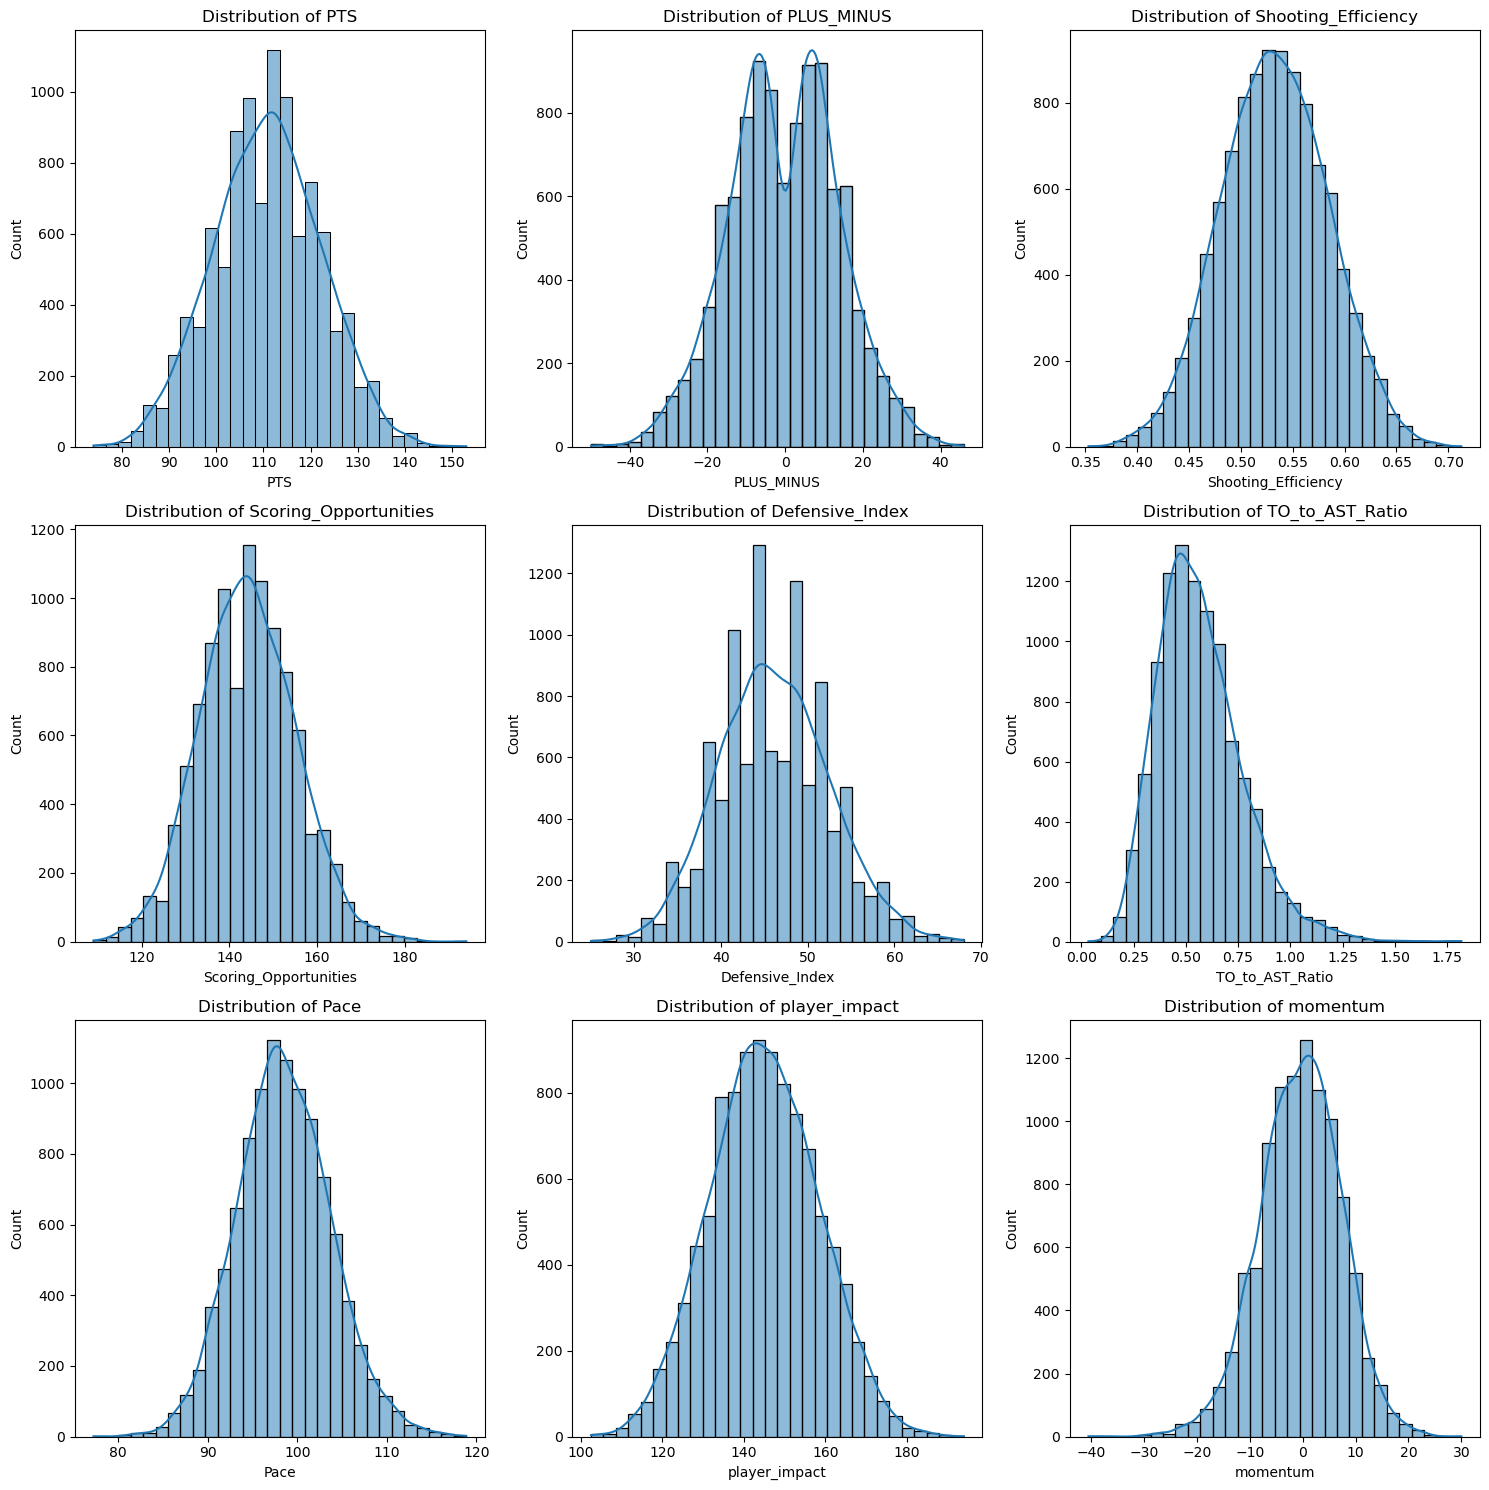

In [57]:
# Metrics to visualize
metrics = ['PTS', 'PLUS_MINUS', 'Shooting_Efficiency', 'Scoring_Opportunities', 
           'Defensive_Index', 'TO_to_AST_Ratio', 'Pace', 'player_impact', 'momentum']

# Plotting the distributions again
plt.figure(figsize=(15, 15))

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=nba_data, x=metric, kde=True, bins=30)
    plt.title(f'Distribution of {metric}')
    plt.tight_layout()

plt.show()

In [59]:
from scipy.stats import ttest_ind
import numpy as np

# Shuffle the dataset and reset the index
shuffled_data = nba_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the data into two halves
mid_idx = len(shuffled_data) // 2
group1 = shuffled_data.loc[:mid_idx, 'PTS']
group2 = shuffled_data.loc[mid_idx:, 'PTS']

# Perform t-test
t_stat, p_val = ttest_ind(group1, group2)

t_stat, p_val


(0.607367467824373, 0.5436205921745667)

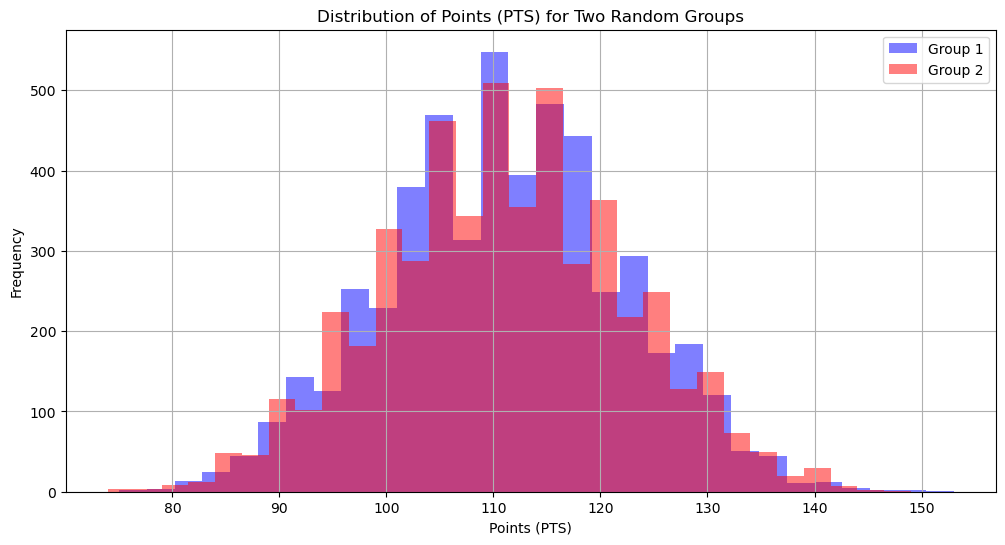

In [60]:
# Plotting the distributions of the two groups
plt.figure(figsize=(12, 6))

plt.hist(group1, bins=30, alpha=0.5, label='Group 1', color='blue')
plt.hist(group2, bins=30, alpha=0.5, label='Group 2', color='red')
plt.xlabel('Points (PTS)')
plt.ylabel('Frequency')
plt.title('Distribution of Points (PTS) for Two Random Groups')
plt.legend()
plt.grid(True)
plt.show()

In [61]:
# Calculate mean and standard deviation for each group
mean_group1 = group1.mean()
std_group1 = group1.std()

mean_group2 = group2.mean()
std_group2 = group2.std()

mean_group1, std_group1, mean_group2, std_group2


(110.9482555860447, 11.182455552727651, 110.81238972750441, 11.411942978432064)

In [63]:
# Given values
mu_1 = mean_group1
sigma_1 = std_group1
n_1 = len(nba_data) // 2  # Assuming half the dataset for group 1

mu_2 = mean_group2
sigma_2 = std_group2
n_2 = len(nba_data) // 2  # Assuming half the dataset for group 2

# Calculating t-statistic
t_statistic = (mu_1 - mu_2) / ((sigma_1**2 / n_1 + sigma_2**2 / n_2)**0.5)
t_statistic


0.6073371012053936

#In this case, the p-value is 0.6073371012053936
#0.6073371012053936, which is greater than 0.05. This means that, based on the data you've collected and the t-test, there's not enough statistical evidence to say that there's a significant #difference in the scoring (points) between the two groups of NBA games.

#In practical terms, this suggests that the random split of games into two groups did not yield groups with significantly different scoring averages, which is in line with our expectations #given that the split was random.

In [66]:
# Convert the 'WL' column to binary format: 1 for 'W' and 0 for 'L'
nba_data['WL_binary'] = nba_data['WL'].apply(lambda x: 1 if x == 'W' else 0)

# Display the first few rows to confirm the changes
nba_data[['WL', 'WL_binary']].head()


,WL,WL_binary
0,L,0
1,L,0
2,L,0
3,W,1
4,L,0


In [70]:
from sklearn.model_selection import train_test_split

# Features and target variable
features = ['PTS', 'Shooting_Efficiency', 'Scoring_Opportunities', 'Defensive_Index', 
            'TO_to_AST_Ratio', 'Pace', 'player_impact', 'momentum']
X = nba_data[features]
y = nba_data['WL_binary']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the train and test sets
X_train.shape, X_test.shape

((8161, 8), (2041, 8))

In [74]:
# Impute missing values with the median of the respective columns
X_train_imputed = X_train.fillna(X_train.median())
X_test_imputed = X_test.fillna(X_train.median())  # Use median from training set to impute testing set

# Check if there are any NaN values left in the imputed dataframes
X_train_imputed.isna().sum(), X_test_imputed.isna().sum()

(PTS                      0
 Shooting_Efficiency      0
 Scoring_Opportunities    0
 Defensive_Index          0
 TO_to_AST_Ratio          0
 Pace                     0
 player_impact            0
 momentum                 0
 dtype: int64,
 PTS                      0
 Shooting_Efficiency      0
 Scoring_Opportunities    0
 Defensive_Index          0
 TO_to_AST_Ratio          0
 Pace                     0
 player_impact            0
 momentum                 0
 dtype: int64)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a logistic regression model
# We'll use a pipeline to first standardize the features and then apply logistic regression
logreg_pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))

# Train the model
logreg_pipeline.fit(X_train_imputed, y_train)
# Train the logistic regression model using the imputed data
logreg_pipeline.fit(X_train_imputed, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Predictions on the test set
y_pred = logreg_pipeline.predict(X_test_imputed)

# Calculate and display the metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-score": f1_score(y_test, y_pred)
}

metrics

{'Accuracy': 0.83390494855463,
 'Precision': 0.8313609467455622,
 'Recall': 0.8338278931750742,
 'F1-score': 0.8325925925925928}

In [97]:
## All Feature Model: 

# Excluding non-predictive columns
exclude_columns = ['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'momentum']

# Features
X = nba_data[['PTS', 'Shooting_Efficiency', 'Scoring_Opportunities', 'Defensive_Index', 
              'TO_to_AST_Ratio', 'Pace', 'player_impact']]

# Targets
y = nba_data.drop(columns=exclude_columns + ['PTS', 'Shooting_Efficiency', 'Scoring_Opportunities', 
                                            'Defensive_Index', 'TO_to_AST_Ratio', 'Pace', 'player_impact', 'momentum'])

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape


((8161, 7), (8161, 21))

In [98]:
print(X_test.isna().sum())

PTS                      0
Shooting_Efficiency      0
Scoring_Opportunities    0
Defensive_Index          0
TO_to_AST_Ratio          0
Pace                     0
player_impact            0
dtype: int64


In [99]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the multi-output regressor
multi_regressor = MultiOutputRegressor(LinearRegression())

# Train the model
multi_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = multi_regressor.predict(X_test)

# Evaluate performance using mean squared error
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')

# Creating a dictionary to pair feature with its MSE
mse_dict = dict(zip(y.columns, mse))

mse_dict


{'MIN': 0.8448359028400116,
 'FGM': 3.597619555645495,
 'FGA': 21.051211250068604,
 'FG_PCT': 0.00021757844743848495,
 'FG3M': 6.867570121332292,
 'FG3A': 20.47096380014566,
 'FG3_PCT': 0.00286100066841123,
 'FTM': 23.230513507484705,
 'FTA': 33.21555661862582,
 'FT_PCT': 0.0029795867660401777,
 'OREB': 4.625348146342776,
 'DREB': 6.22704557987965,
 'REB': 6.174838843789539,
 'AST': 6.176753210823664,
 'STL': 5.467315567016927,
 'BLK': 3.4163000438577584,
 'TOV': 2.4585713291490445,
 'PF': 15.310519960133242,
 'PLUS_MINUS': 63.29934749159272,
 'AWAY': 0.247774816741686,
 'WL_binary': 0.12756922524160794}

In [101]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Features and target variables
features = ['Shooting_Efficiency', 'Scoring_Opportunities', 'Defensive_Index', 'TO_to_AST_Ratio']
targets = ['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 
           'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'WL_binary']

X = nba_data[features]
y = nba_data[targets]

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Multi-output regression model
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train_scaled, y_train)

# Checking the model's performance on the test set
test_score = model.score(X_test_scaled, y_test)
test_score


0.3375149971391289

In [103]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# Define the target variables
target_vars = ['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 
               'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 
               'TOV', 'WL_binary']

# Define the features
features = ['Shooting_Efficiency', 'Scoring_Opportunities', 'Defensive_Index', 'TO_to_AST_Ratio']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(nba_data[features], nba_data[target_vars], test_size=0.2, random_state=42)

# Initialize the multi-output regressor with a random forest regressor
multi_output_regressor = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
multi_output_regressor.fit(X_train, y_train)

# Now, predict the outcomes for the matchups using mean values
predicted_lakers_denver = multi_output_regressor.predict(input_data_lakers_denver)
predicted_phoenix_warriors = multi_output_regressor.predict(input_data_phoenix_warriors)

predicted_lakers_denver, predicted_phoenix_warriors


c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\t

(array([[239.91   ,  41.51   ,  88.51   ,   0.45997,  12.31   ,  34.42   ,
           0.36148,  16.36   ,  21.22   ,   0.77878,  13.33   ,  34.03   ,
          45.58   ,  24.98   ,   7.74   ,   4.45   ,  15.57   ,   0.57   ]]),
 array([[239.91   ,  41.51   ,  88.51   ,   0.45997,  12.31   ,  34.42   ,
           0.36148,  16.36   ,  21.22   ,   0.77878,  13.33   ,  34.03   ,
          45.58   ,  24.98   ,   7.74   ,   4.45   ,  15.57   ,   0.57   ]]))

In [104]:
# Splitting the data into training and test sets
# The training set will be all but the most recent season, and the test set will be the most recent season

# Sorting the data by GAME_DATE to ensure chronological order
nba_data_sorted = nba_data.sort_values(by='GAME_DATE')

# Extracting the most recent season's data for testing
test_data = nba_data_sorted[nba_data_sorted['SEASON_ID'] == nba_data_sorted['SEASON_ID'].iloc[-1]]

# The rest of the data will be used for training
train_data = nba_data_sorted[nba_data_sorted['SEASON_ID'] != nba_data_sorted['SEASON_ID'].iloc[-1]]

train_data.shape, test_data.shape


((10074, 37), (128, 37))

In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define the features and target variable
features = ['Shooting_Efficiency', 'Scoring_Opportunities', 'Defensive_Index', 'TO_to_AST_Ratio']
X_train_rf = train_data[features]
y_train_rf = train_data['PTS']
X_val_rf = val_data[features]
y_val_rf = val_data['PTS']

# Train a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_rf, y_train_rf)

# Predict on the validation set
y_val_pred_rf = rf_regressor.predict(X_val_rf)

# Evaluate the model
mae_rf = mean_absolute_error(y_val_rf, y_val_pred_rf)
r2_rf = r2_score(y_val_rf, y_val_pred_rf)

mae_rf, r2_rf


NameError: name 'val_data' is not defined

In [9]:
nba_players = players.get_players()

nba_players = pd.DataFrame(nba_players)

nba_players.head()

nba_players.index.size

4815

In [10]:
import pandas as pd
from nba_api.stats.endpoints import playercareerstats, commonplayerinfo
from nba_api.stats.static import players
import time

# Step 1: Get all players
nba_players = players.get_players()
nba_players_df = pd.DataFrame(nba_players)

# Initialize an empty list to store all players' career data
all_players_career_data = []

# Step 2: Loop through each player and get their career data
for index, row in nba_players_df.iterrows():
    player_id = row['id']
    
    try:
        # Fetch player career stats
        career = playercareerstats.PlayerCareerStats(player_id=player_id)
        player_career = career.get_data_frames()[0]
        
        # Fetch player info
        player_info = commonplayerinfo.CommonPlayerInfo(player_id=player_id).get_data_frames()[0]
        player_info = player_info.rename(columns={'PERSON_ID': 'PLAYER_ID'})
        player_info = player_info[['PLAYER_ID', 'DISPLAY_FIRST_LAST', 'DRAFT_YEAR', 'DRAFT_NUMBER']]
        
        # Merge career data with player info
        player_career = pd.merge(player_career, player_info, on='PLAYER_ID', how='left')
        player_career = player_career[['DISPLAY_FIRST_LAST'] + [col for col in player_career.columns if col != 'DISPLAY_FIRST_LAST']]
        
        # Append the player's career data to the list
        all_players_career_data.append(player_career)
        
        # To avoid hitting API rate limits, sleep for a short time
        time.sleep(0.5)
    
    except Exception as e:
        print(f"Could not retrieve data for player ID {player_id}: {e}")
        continue

# Step 3: Combine all players' data into a single DataFrame
all_players_career_df = pd.concat(all_players_career_data, ignore_index=True)

# Step 4: Save or display the combined DataFrame
all_players_career_df.to_csv('all_players_career_data.csv', index=False)

# Alternatively, display the DataFrame
all_players_career_df.head()


Could not retrieve data for player ID 201180: HTTPSConnectionPool(host='stats.nba.com', port=443): Read timed out. (read timeout=30)
Could not retrieve data for player ID 1743: HTTPSConnectionPool(host='stats.nba.com', port=443): Read timed out. (read timeout=30)
Could not retrieve data for player ID 78281: HTTPSConnectionPool(host='stats.nba.com', port=443): Read timed out. (read timeout=30)
Could not retrieve data for player ID 2552: HTTPSConnectionPool(host='stats.nba.com', port=443): Read timed out. (read timeout=30)


,DISPLAY_FIRST_LAST,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,DRAFT_YEAR,DRAFT_NUMBER
0,Alaa Abdelnaby,76001,1990-91,00,1610612757,POR,23.0,43,0,290.0,...,62,89,12,4,12,22,39,135,1990,25
1,Alaa Abdelnaby,76001,1991-92,00,1610612757,POR,24.0,71,1,934.0,...,179,260,30,25,16,66,132,432,1990,25
2,Alaa Abdelnaby,76001,1992-93,00,1610612749,MIL,25.0,12,0,159.0,...,25,37,10,6,4,13,24,64,1990,25
3,Alaa Abdelnaby,76001,1992-93,00,1610612738,BOS,25.0,63,52,1152.0,...,186,300,17,19,22,84,165,514,1990,25
4,Alaa Abdelnaby,76001,1992-93,00,0,TOT,25.0,75,52,1311.0,...,211,337,27,25,26,97,189,578,1990,25


In [14]:
# Reimporting the original data for clarity in the process
salary_data_00_to_2017 = pd.read_csv('salary_data_00_to_2017.csv', encoding='ISO-8859-1')
salary_data_2018_to_2024 = pd.read_csv('Player - Salaries per Year (2018 - 2024).csv', encoding='ISO-8859-1')
player_careers = pd.read_csv('player_careers_00_to_24.csv', encoding='ISO-8859-1')

# Standardize the player name columns for merging
salary_data_2018_to_2024.rename(columns={'Player Name': 'Player_Name'}, inplace=True)

# Extract the season (start year) from the 'Year' column in salary_data_2018_to_2024 for alignment with salary_data_00_to_2017
salary_data_2018_to_2024['Season_Start'] = salary_data_2018_to_2024['Year'].str.split('-').str[0].astype(int)

# Convert Salary in salary_data_2018_to_2024 to numerical format for consistency with salary_data_00_to_2017
salary_data_2018_to_2024['Salary'] = salary_data_2018_to_2024['Salary'].replace('[\$,]', '', regex=True).astype(float)

# Convert Salary in salary_data_00_to_2017 to numerical format
salary_data_00_to_2017['Salary'] = salary_data_00_to_2017['Salary'].replace('[\$,]', '', regex=True).astype(float)

# Merge the datasets on Player_Name and Season_Start (from salary_data_2018_to_2024) or Season_End (from salary_data_00_to_2017)
merged_df = pd.merge(salary_data_00_to_2017, salary_data_2018_to_2024, how='outer', 
                     left_on=['Player_Name', 'Season_End'], 
                     right_on=['Player_Name', 'Season_Start'])

# Combine Salary columns into one
merged_df['Salary'] = merged_df['Salary_y'].combine_first(merged_df['Salary_x'])

# Use the existing Season column from df_2 or Year from df_1
merged_df['Season'] = merged_df['Season'].combine_first(merged_df['Year'])

# Select only the necessary columns
cleaned_merged_df = merged_df[['Player_Name', 'Salary', 'Season', 'Team']]

cleaned_merged_df.tail()

,Player_Name,Salary,Season,Team
19392,Izaiah Brockington,64343.0,2023-24,NaN
19393,Jalen Crutcher,64343.0,2023-24,NaN
19394,Timmy Allen,64343.0,2023-24,NaN
19395,Edmond Sumner,40459.0,2023-24,NaN
19396,Kaiser Gates,35389.0,2023-24,NaN


In [35]:
# Load the new player_careers dataset
player_careers_updated = pd.read_csv('player_careers_00_to_24.csv', encoding='ISO-8859-1')

# Rename the player name column for merging
cleaned_merged_df.rename(columns={'Player_Name': 'DISPLAY_FIRST_LAST'}, inplace=True)

# Merge with the cleaned salary data on DISPLAY_FIRST_LAST and SEASON_ID, keeping all rows from player_careers
final_merged_careers_df = pd.merge(player_careers_updated, cleaned_merged_df, how='left', 
                                   left_on=['DISPLAY_FIRST_LAST', 'SEASON_ID'], 
                                   right_on=['DISPLAY_FIRST_LAST', 'Season'])

final_merged_careers_df.drop(columns=['Season'], inplace=True)
final_merged_careers_df.drop(columns=['Team'], inplace=True)

final_merged_careers_df_dropped = final_merged_careers_df.dropna(subset=['Salary'])

final_merged_careers_df_dropped['DRAFT_NUMBER'] = final_merged_careers_df_dropped['DRAFT_NUMBER'].fillna('Unavailable')


final_merged_careers_df_dropped.tail()

C:\Users\thoma\AppData\Local\Temp\ipykernel_35120\3974234666.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_merged_df.rename(columns={'Player_Name': 'DISPLAY_FIRST_LAST'}, inplace=True)
C:\Users\thoma\AppData\Local\Temp\ipykernel_35120\3974234666.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged_careers_df_dropped['DRAFT_NUMBER'] = final_merged_careers_df_dropped['DRAFT_NUMBER'].fillna('Unavailable')


,DISPLAY_FIRST_LAST,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,REB,AST,STL,BLK,TOV,PF,PTS,DRAFT_YEAR,DRAFT_NUMBER,Salary
24463,Marques Bolden,1629716,2023-24,0,1610612766,CHA,26,9,2,118,...,32,4,3,7,3,9,37,2019,Unavailable,502131.0
24464,Marques Bolden,1629716,2023-24,0,0,TOT,26,11,2,121,...,34,4,3,7,3,10,37,2019,Unavailable,502131.0
24465,Armoni Brooks,1629717,2023-24,0,1610612751,BKN,26,10,0,104,...,18,5,1,1,3,3,42,2019,Unavailable,241285.0
24466,Haywood Highsmith,1629312,2023-24,0,1610612748,MIA,27,66,26,1366,...,210,70,53,30,34,117,405,2018,Unavailable,1902137.0
24468,Lindell Wigginton,1629623,2023-24,0,1610612749,MIL,26,3,0,8,...,0,0,0,0,1,1,6,2019,Unavailable,244502.0


In [38]:
final_merged_careers_df_dropped.info()

final_merged_careers_df_dropped.to_csv('career_and_salary_data.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21980 entries, 0 to 24468
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DISPLAY_FIRST_LAST  21980 non-null  object 
 1   PLAYER_ID           21980 non-null  int64  
 2   SEASON_ID           21980 non-null  object 
 3   LEAGUE_ID           21980 non-null  int64  
 4   TEAM_ID             21980 non-null  int64  
 5   TEAM_ABBREVIATION   21980 non-null  object 
 6   PLAYER_AGE          21980 non-null  int64  
 7   GP                  21980 non-null  int64  
 8   GS                  21980 non-null  int64  
 9   MIN                 21980 non-null  int64  
 10  FGM                 21980 non-null  int64  
 11  FGA                 21980 non-null  int64  
 12  FG_PCT              21980 non-null  float64
 13  FG3M                21980 non-null  int64  
 14  FG3A                21980 non-null  int64  
 15  FG3_PCT             21980 non-null  float64
 16  FTM 